# 6. Machine learning with Spark MLlib

For this project, there will be no "walkthrough", you will be free to do your own machine learning, as long as you follow these guidelines:

1. Choose **any** dataset from http://archive.ics.uci.edu/ml/index.php
2. Download the dataset file and upload to Databricks. If you want to use another dataset, it's okay as long as it's public.
3. Explore it using DataFrames, including **at least** the following steps:
  1. Reading the file into a DataFrame
  2. Running some aggregations and explorations using DataFrame functions
4. Your solution notebook must have a part using MLlib, including **at least** the following steps:
  1. Converting into MLlib matrix
  2. Applying some statistics with the  MLlib's API
  3. Learning a classification or regression model
  4. Applying the model to the test data and computing the errors
5. You'll also train another model using Pipelines:
  1. Creating a pipeline with **at least** one feature extraction/manipulation and one model estimator
  2. Fitting the pipeline to the training data
  3. Applying the model to the test data and computing the errors
6. Finally you should try to apply a third party ML library for instance [tune scikit-learn meta-parameters using spark](https://docs.databricks.com/spark/latest/mllib/third-party-libraries.html#scikit-learn).
7. No report needed !! Just add some comment as part of the Notebook. The notebook should be self-sufficient. I'm expecting a short written analysis (and you should know that "We found nothing after testing *this* and *that* is already a valuable result), but also some plots. You can use any library (matplotlib, bokeh...). Just be sure to [watch this video first](https://www.youtube.com/watch?v=xAoljeRJ3lU)

Notes: 
  - Don't forget to split your data into training and test (and validation if you want) sets
  - Your code should be readable. ** DO NO FORGET [PEP8](https://www.python.org/dev/peps/pep-0008/)**
  - You can do this project in groups of **4 members**
  - All submissions after the deadlines won't be considered
    - **It's much better to submit an incomplete solution than nothing at all!**
  - If you have any question or problem, don't hesitate to send me an e-mail; I try to answer as quickly as possible (usually under 24h)
  - If you want to use this project as a display of your skills, you can upload it on github when you're done. It's a good opportunity (and for some tech companies, a github can be better than a resume). If you're not sure how, let me know, I'll help you and give you advise on how to make it look pretty. **This could be really important for you if you're targeting tech jobs**
  - Even if it seems obvious, **do not cheat**. I won't be nice if I suspect it.
  
Resources:
  - [Spark MLlib guide](https://spark.apache.org/docs/latest/ml-guide.html)
  - [Databricks MLlib guide](https://docs.databricks.com/spark/latest/mllib/index.html#)
  - [pyspark MLlib RDD API docs](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html)
  - [pyspark MLlib DataFrame API docs](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html)
  - [pyspark complete docs](https://spark.apache.org/docs/latest/api/python/)
  - [Course Homepage](https://waterponey.github.io/SparkCourse/)
  
### May the force be with you!

### 1. Data set description and Objective
1. Prosper Loan Data Set 
 - link to download the data : https://github.com/joashxu/prosper-loan-data/tree/master/dataset 
 - Prosper is the first company in the United States which proposes Peer-to-peer lendings. Peer-to-peer lending is a method of debt financing that enables individuals to borrow and lend money without the use of an official financial institution as an intermediary.This project aims at predicting whether borrowers will default or not on their prosper loans. To do so, we use a Prosper’s loan data containing a bunch of information concerning borrowers as well as their lenders.
 
2. Objectives
 - Focus on individuals who completed their loan and on individuals with default
 - Identify most related explanatory variables with the loan status through exploratory data analysis
 - Predict a loan status through the use of Random Forest and Logistic Regression

### Import libraries

In [4]:
from pyspark.sql import functions as fn

## I. Data importation and preprocessing

In this part, we implement the data pre-processing procedure: 
we select the relevant features for our study and we clean the dataset by recoding some of the variables so that we can exploit them in the next step or exploratory analysis and modelling. Let's firt import the dataset.

#####Importing the the `loan_data` dataset into spark dataframe

In [8]:
#here we use the 'inferSchema' option equal to true so that spark guess the types (integer, string...) of the variables
loan_data = spark.read.csv("/FileStore/tables/prosperLoanData.csv", sep = ",", inferSchema = True, header = True)

##### Content and structure of the `loan_data` dataset

In [10]:
## Data set dimensions
print("Before any cleaning, the Prosper Loan dataset contains", loan_data.count(), 
      "observations and", len(loan_data.schema.names), 
      "related to the financial situation of the borrower, their credit profile as well as information concerning investors.")

Before any cleaning, the Prosper Loan dataset contains 113937 observations and 81 related to the financial situation of the borrower, their credit profile as well as information concerning investors.

Here is the structure of the dataset. The variable types were guessed with the `inferschema = True` option when importing the data. One can thus have a glimpse of the content of the dataset using the 
`printSchema` function.

In [12]:
# print the column names and types
loan_data.printSchema()

root
-- ListingKey: string (nullable = true)
-- ListingNumber: integer (nullable = true)
-- ListingCreationDate: timestamp (nullable = true)
-- CreditGrade: string (nullable = true)
-- Term: integer (nullable = true)
-- LoanStatus: string (nullable = true)
-- ClosedDate: timestamp (nullable = true)
-- BorrowerAPR: double (nullable = true)
-- BorrowerRate: double (nullable = true)
-- LenderYield: double (nullable = true)
-- EstimatedEffectiveYield: double (nullable = true)
-- EstimatedLoss: double (nullable = true)
-- EstimatedReturn: double (nullable = true)
-- ProsperRating (numeric): integer (nullable = true)
-- ProsperRating (Alpha): string (nullable = true)
-- ProsperScore: double (nullable = true)
-- ListingCategory (numeric): integer (nullable = true)
-- BorrowerState: string (nullable = true)
-- Occupation: string (nullable = true)
-- EmploymentStatus: string (nullable = true)
-- EmploymentStatusDuration: integer (nullable = true)
-- IsBorrowerHomeowner: boolean (nullable = true)
-- CurrentlyInGroup: boolean (nullable = true)
-- GroupKey: string (nullable = true)
-- DateCreditPulled: timestamp (nullable = true)
-- CreditScoreRangeLower: integer (nullable = true)
-- CreditScoreRangeUpper: integer (nullable = true)
-- FirstRecordedCreditLine: timestamp (nullable = true)
-- CurrentCreditLines: integer (nullable = true)
-- OpenCreditLines: integer (nullable = true)
-- TotalCreditLinespast7years: integer (nullable = true)
-- OpenRevolvingAccounts: integer (nullable = true)
-- OpenRevolvingMonthlyPayment: double (nullable = true)
-- InquiriesLast6Months: integer (nullable = true)
-- TotalInquiries: double (nullable = true)
-- CurrentDelinquencies: integer (nullable = true)
-- AmountDelinquent: double (nullable = true)
-- DelinquenciesLast7Years: integer (nullable = true)
-- PublicRecordsLast10Years: integer (nullable = true)
-- PublicRecordsLast12Months: integer (nullable = true)
-- RevolvingCreditBalance: double (nullable = true)
-- BankcardUtilization: double (nullable = true)
-- AvailableBankcardCredit: double (nullable = true)
-- TotalTrades: double (nullable = true)
-- TradesNeverDelinquent (percentage): double (nullable = true)
-- TradesOpenedLast6Months: double (nullable = true)
-- DebtToIncomeRatio: double (nullable = true)
-- IncomeRange: string (nullable = true)
-- IncomeVerifiable: boolean (nullable = true)
-- StatedMonthlyIncome: double (nullable = true)
-- LoanKey: string (nullable = true)
-- TotalProsperLoans: integer (nullable = true)
-- TotalProsperPaymentsBilled: integer (nullable = true)
-- OnTimeProsperPayments: integer (nullable = true)
-- ProsperPaymentsLessThanOneMonthLate: integer (nullable = true)
-- ProsperPaymentsOneMonthPlusLate: integer (nullable = true)
-- ProsperPrincipalBorrowed: double (nullable = true)
-- ProsperPrincipalOutstanding: double (nullable = true)
-- ScorexChangeAtTimeOfListing: integer (nullable = true)
-- LoanCurrentDaysDelinquent: integer (nullable = true)
-- LoanFirstDefaultedCycleNumber: integer (nullable = true)
-- LoanMonthsSinceOrigination: integer (nullable = true)
-- LoanNumber: integer (nullable = true)
-- LoanOriginalAmount: integer (nullable = true)
-- LoanOriginationDate: timestamp (nullable = true)
-- LoanOriginationQuarter: string (nullable = true)
-- MemberKey: string (nullable = true)
-- MonthlyLoanPayment: double (nullable = true)
-- LP_CustomerPayments: double (nullable = true)
-- LP_CustomerPrincipalPayments: double (nullable = true)
-- LP_InterestandFees: double (nullable = true)
-- LP_ServiceFees: double (nullable = true)
-- LP_CollectionFees: double (nullable = true)
-- LP_GrossPrincipalLoss: double (nullable = true)
-- LP_NetPrincipalLoss: double (nullable = true)
-- LP_NonPrincipalRecoverypayments: double (nullable = true)
-- PercentFunded: double (nullable = true)
-- Recommendations: integer (nullable = true)
-- InvestmentFromFriendsCount: integer (nullable = true)
-- InvestmentFromFriendsAmount: double (nullable = true)
-- Investors: integer (nullable = t

In [13]:
# print 5 rows of the dataset
display(loan_data.limit(5))

ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1021339766868145413AB3B,193129,2007-08-26T19:09:29.263+0000,C,36,Completed,2009-08-14T00:00:00.000+0000,0.16516,0.158,0.138,null,null,null,null,null,null,0,CO,Other,Self-employed,2,true,true,null,2007-08-26T18:41:46.780+0000,640,659,2001-10-11T00:00:00.000+0000,5,4,12,1,24.0,3,3.0,2,472.0,4,0,0,0.0,0.0,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",true,3083.333333,E33A3400205839220442E84,null,null,null,null,null,null,null,null,0,null,78,19141,9425,2007-09-12T00:00:00.000+0000,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
10273602499503308B223C1,1209647,2014-02-27T08:28:07.900+0000,null,36,Current,null,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6,A,7.0,2,CO,Professional,Employed,44,false,false,null,2014-02-27T08:28:14.000+0000,680,699,1996-03-18T00:00:00.000+0000,14,14,29,13,389.0,3,5.0,0,0.0,0,1,0,3989.0,0.21,10266.0,29.0,1.0,2.0,0.18,"$50,000-74,999",true,6125.0,9E3B37071505919926B1D82,null,null,null,null,null,null,null,null,0,null,0,134815,10000,2014-03-03T00:00:00.000+0000,Q1 2014,1D13370546739025387B2F4,318.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
0EE9337825851032864889A,81716,2007-01-05T15:00:47.090+0000,HR,36,Completed,2009-12-17T00:00:00.000+0000,0.28269,0.275,0.24,null,null,null,null,null,null,0,GA,Other,Not available,null,false,true,783C3371218786870A73D20,2007-01-02T14:09:10.060+0000,480,499,2002-07-27T00:00:00.000+0000,null,null,3,0,0.0,0,1.0,1,null,0,0,null,null,null,null,null,null,null,0.06,Not displayed,true,2083.333333,6954337960046817851BCB2,null,null,null,null,null,null,null,null,0,null,86,6466,3001,2007-01-17T00:00:00.000+0000,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.2,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
0EF5356002482715299901A,658116,2012-10-22T11:02:35.010+0000,null,36,Current,null,0.12528,0.0974,0.0874,0.0849,0.0249,0.06,6,A,9.0,16,GA,Skilled Labor,Employed,113,true,false,null,2012-10-22T11:02:32.000+0000,800,819,1983-02-28T00:00:00.000+0000,5,5,29,7,115.0,0,1.0,4,10056.0,14,0,0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",true,2875.0,A0393664465886295619C51,null,null,null,null,null,null,null,null,0,null,16,77296,10000,2012-11-01T00:00:00.000+0000,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
0F023589499656230C5E3E2,909464,2013-09-14T18:38:39.097+0000,null,36,Current,null,0.24614,0.2085,0.1

##### Definition of our target variable
In the dataset, there exist different loan status. The most frequent status is the 'Current' status, meaning that the loan is currently being reimbursed. As well as 'Completed' and 'Defaulted' status, there is also information about late individuals ('Past Due' status).

In [15]:
#The different status of a loan and its frequency
display(loan_data.groupBy(loan_data.LoanStatus).count().orderBy('count', ascending = False))

LoanStatus,count
Current,56576
Completed,38074
Chargedoff,11992
Defaulted,5018
Past Due (1-15 days),806
Past Due (31-60 days),363
Past Due (61-90 days),313
Past Due (91-120 days),304
Past Due (16-30 days),265
FinalPaymentInProgress,205


We will only focus on loans that have been completed or defaulted. Therefore, we filter out other types of loan status and we create a binary variable equal to 1 if status is 'Defaulted' and equal to 0 if 'Completed'.

In [17]:
#Select only defaulted and completed loans
loan_data1 = loan_data.filter(loan_data.LoanStatus.isin(["Completed", "Defaulted"]))

#check we only select Completed & Defaulted loans
loan_data1.count() == 5018 + 38074

Out[ 49 ]: True

In [18]:
# Create a numeric target variable : equals 1 if Defaulted, 0 otherwise
loan_data1 = loan_data1.withColumn("target", fn.when(loan_data.LoanStatus == "Defaulted", 1).otherwise(0))

# Number of completed and defaulted loans
result = loan_data1.groupby("LoanStatus")\
                   .agg(fn.count("target").alias("count"), 
                        fn.round( (fn.count("target") / loan_data1.count()) ,3).alias("proportion"))
display(result)

LoanStatus,count,proportion
Defaulted,5018,0.116
Completed,38074,0.884


##### Pre-selection of relevant features
Studying the dictionary of variables, we saw that our dataset is composed of different categories of variables : Loan Information, Borrower Profile, Bank Profit, Borrower History Record and some other Administrative information.

In this study, we are only interested in explaining the Loan Status of a borrower with information about his profile, his history record and his loan. Therefore, before going any further, let us select the variables corresponding to those categories.

In [20]:
#Selection of the columns of interest
loan_data2 = loan_data1.select("CreditGrade", "Term", "BorrowerAPR", "ProsperScore", "ListingCategory (numeric)", 
                               "BorrowerState", "EmploymentStatus", "EmploymentStatusDuration", "IsBorrowerHomeowner", 
                               "CreditScoreRangeLower", "CreditScoreRangeUpper", "OpenCreditLines", "AmountDelinquent", 
                               "DelinquenciesLast7Years", "PublicRecordsLast12Months", "RevolvingCreditBalance", 
                               "AvailableBankcardCredit", "DebtToIncomeRatio", "IncomeRange", "TotalProsperLoans", 
                               "TotalProsperPaymentsBilled", "ProsperPaymentsLessThanOneMonthLate", "ProsperPaymentsOneMonthPlusLate", 
                               "ProsperPrincipalBorrowed", "ScorexChangeAtTimeOfListing", "LoanCurrentDaysDelinquent", 
                               "loanOriginalAmount", "Recommendations", "InvestmentFromFriendsAmount", "LoanStatus", "target")

In [21]:
#Print the number of variables
print("Number of explanatory variables after cleaning:", len(loan_data2.schema.names) - 2)

Number of explanatory variables after cleaning: 29

##### Cleaning the dataset
We first check the schema of our new restricted dataset:

In [23]:
loan_data2.printSchema()

root
-- CreditGrade: string (nullable = true)
-- Term: integer (nullable = true)
-- BorrowerAPR: double (nullable = true)
-- ProsperScore: double (nullable = true)
-- ListingCategory (numeric): integer (nullable = true)
-- BorrowerState: string (nullable = true)
-- EmploymentStatus: string (nullable = true)
-- EmploymentStatusDuration: integer (nullable = true)
-- IsBorrowerHomeowner: boolean (nullable = true)
-- CreditScoreRangeLower: integer (nullable = true)
-- CreditScoreRangeUpper: integer (nullable = true)
-- OpenCreditLines: integer (nullable = true)
-- AmountDelinquent: double (nullable = true)
-- DelinquenciesLast7Years: integer (nullable = true)
-- PublicRecordsLast12Months: integer (nullable = true)
-- RevolvingCreditBalance: double (nullable = true)
-- AvailableBankcardCredit: double (nullable = true)
-- DebtToIncomeRatio: double (nullable = true)
-- IncomeRange: string (nullable = true)
-- TotalProsperLoans: integer (nullable = true)
-- TotalProsperPaymentsBilled: integer (nullable = true)
-- ProsperPaymentsLessThanOneMonthLate: integer (nullable = true)
-- ProsperPaymentsOneMonthPlusLate: integer (nullable = true)
-- ProsperPrincipalBorrowed: double (nullable = true)
-- ScorexChangeAtTimeOfListing: integer (nullable = true)
-- LoanCurrentDaysDelinquent: integer (nullable = true)
-- loanOriginalAmount: integer (nullable = true)
-- Recommendations: integer (nullable = true)
-- InvestmentFromFriendsAmount: double (nullable = true)
-- LoanStatus: string (nullable = true)
-- target: integer (nullable = false)

Here is a list of the required treatments : 
  - Recode the ListingCategory variable using the dictionary of variables to display the categories instead of indexes
  - Use strings instead of boolean values for the IsBorrowerHomeowner variable

In [25]:
# Give a shorter name to the "ListingCaterory(numeric)" variable
loan_data2 = loan_data2.withColumnRenamed("ListingCategory (numeric)", "ListingCategory")

# Replace indexes with their corresonding labels
loan_data2 = loan_data2.withColumn("LoanCategory", fn.when(loan_data2.ListingCategory == 0, "Not Available")
                                   .when(loan_data2.ListingCategory == 1, "Debt Consolidation")
                                   .when(loan_data2.ListingCategory == 2, "Home Improvement")
                                   .when(loan_data2.ListingCategory == 3, "Business")
                                   .when(loan_data2.ListingCategory == 4, "Personal Loan")
                                   .when(loan_data2.ListingCategory == 5, "Student Use")
                                   .when(loan_data2.ListingCategory == 6, "Auto")
                                   .when(loan_data2.ListingCategory == 7, "Other")
                                   .when(loan_data2.ListingCategory == 8, "Baby&Adoption")
                                   .when(loan_data2.ListingCategory == 9, "Boat")
                                   .when(loan_data2.ListingCategory == 10, "Cosmetic Procedure")
                                   .when(loan_data2.ListingCategory == 11, "Engagement Ring")
                                   .when(loan_data2.ListingCategory == 12, "Green Loans")
                                   .when(loan_data2.ListingCategory == 13, "Household Expenses")
                                   .when(loan_data2.ListingCategory == 14, "Large Purchases")
                                   .when(loan_data2.ListingCategory == 15, "Medical/Dental")
                                   .when(loan_data2.ListingCategory == 16, "Motorcycle")
                                   .when(loan_data2.ListingCategory == 17, "RV")
                                   .when(loan_data2.ListingCategory == 18, "Taxes")
                                   .when(loan_data2.ListingCategory == 19, "Vacation")
                                   .when(loan_data2.ListingCategory == 20, "Wedding Loans"))

# Drop the old ListingCategory variable
loan_data2 = loan_data2.drop("ListingCategory")

In [26]:
# IsBorrowerHomeowner variable
loan_data2 = loan_data2.withColumn("IsHomeowner", fn.when(loan_data2.IsBorrowerHomeowner == True, "yes").otherwise("no"))

# Drop the old IsBorrowerHomeowner variable
loan_data2 = loan_data2.drop("IsBorrowerHomeowner")

## II. Data exploration

Let's now perform some data exploration through descriptive statistics in order to have a better insight of the data.

In [29]:
#import necessary packages
import pylab
from scipy.stats import norm
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from cycler import cycler
import matplotlib.pyplot as plt
import seaborn as sns

In this part we will implement exploratory analysis using Python visualization packages. Beforehand, we need to separate numerical variables from categorical variables using the following procedure.

In [31]:
#initialize empty list to put the variable types then fill it using a loop
var_type = {} 
for var in loan_data2.dtypes:
  var_type[ var[0] ] = var[1]

#initialize empty lists of numerical vs categorical variables
#numerical
var_num=[] 

#categorical
var_cat=[] 

#using a loop, fill the lists with the variable names
for var in loan_data2.columns:
  if var_type[var] in ['int','double']:
    var_num.append(var)
  else:
    var_cat.append(var)

#create spark dataframes of only numerical vs only categorical variables
var_num = loan_data2[var_num] 
var_cat = loan_data2[var_cat]

#convert spark dataframe to pandas dataframes in order to implement visualizations
var_num_pd = var_num.toPandas()
var_cat_pd = var_cat.toPandas()

### Univariate Analysis
First we study our target variable: how many clients defaulted in the dataset?

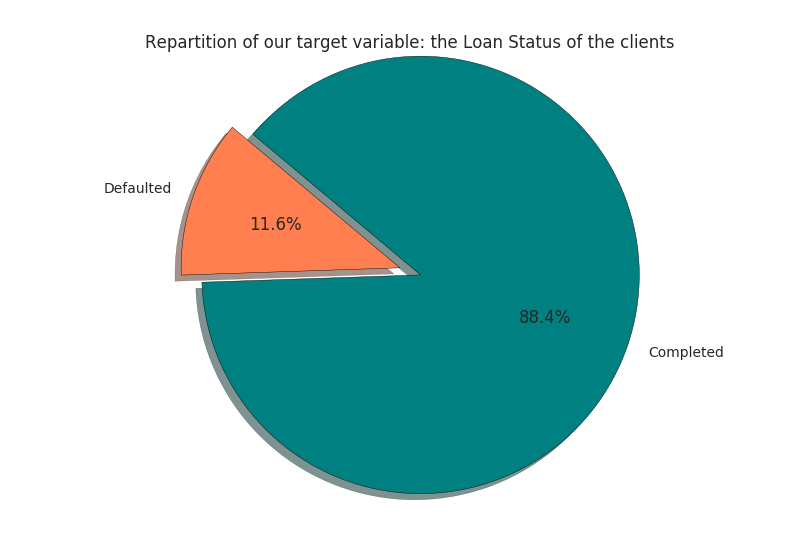

In [33]:
#create a pie chart using matplotlib
#labels of the divisions
labels = 'Defaulted', 'Completed'
#size of parts of the pie
sizes = [var_num_pd['target'].sum(), var_num_pd['target'].count() - var_num_pd['target'].sum()]
#define colors: red = has defaulted
colors = ['coral', 'teal']
#accentuation on defaulted clients
explode = (0, 0.1)  
 
#construct the plot
fig, ax = plt.subplots()
ax = plt.pie(sizes, explode = explode, labels = labels, 
             colors = colors, autopct = '%1.1f%%', shadow = True, 
             startangle = 140)
plt.axis('equal')
plt.title('Repartition of our target variable: the Loan Status of the clients')

display(fig)

It looks that most of people pay back their loan as the number of defaulted loans is relatively low (12%) compared to the number of completed loans (88%). Let's have a look of at the main loan categories:

In [35]:
from pyspark.mllib.stat import Statistics
#drop rows with NAs
var_num_na = var_num.na.drop()
#summary statistics for numerical variables
Stats_num = Statistics.colStats(var_num_na.rdd.map(tuple))

for i in range(0,17):
  print("---------------------------")
  print("Column %s :" % var_num_na.columns[i])
  print("Mean = %s" % Stats_num.mean()[i])
  print("Variance = %s" % Stats_num.variance()[i])
  print("Maximum = %s" % Stats_num.max()[i])
  print("Minimum = %s" % Stats_num.min()[i])

---------------------------
Column Term :
Mean = 37.3843085106
Variance = 102.366663129
Maximum = 60.0
Minimum = 12.0
---------------------------
Column BorrowerAPR :
Mean = 0.228881557513
Variance = 0.00841358228221
Maximum = 0.41355
Minimum = 0.04583
---------------------------
Column ProsperScore :
Mean = 6.33078457447
Variance = 6.21874292549
Maximum = 11.0
Minimum = 1.0
---------------------------
Column EmploymentStatusDuration :
Mean = 98.696143617
Variance = 7648.04697432
Maximum = 582.0
Minimum = 0.0
---------------------------
Column CreditScoreRangeLower :
Mean = 689.920212766
Variance = 3245.74591889
Maximum = 880.0
Minimum = 600.0
---------------------------
Column CreditScoreRangeUpper :
Mean = 708.920212766
Variance = 3245.74591889
Maximum = 899.0
Minimum = 619.0
---------------------------
Column OpenCreditLines :
Mean = 9.36585771277
Variance = 23.6255606275
Maximum = 48.0
Minimum = 0.0
---------------------------
Column AmountDelinquent :
Mean = 1068.04704122
Variance = 54743146.9762
Maximum = 223738.0
Minimum = 0.0
---------------------------
Column DelinquenciesLast7Years :
Mean = 3.40508643617
Variance = 71.1956449468
Maximum = 99.0
Minimum = 0.0
---------------------------
Column PublicRecordsLast12Months :
Mean = 0.00980718085106
Variance = 0.0130376353
Maximum = 4.0
Minimum = 0.0
---------------------------
Column RevolvingCreditBalance :
Mean = 15117.7627992
Variance = 806022154.31
Maximum = 483511.0
Minimum = 0.0
---------------------------
Column AvailableBankcardCredit :
Mean = 11055.2185838
Variance = 458373159.481
Maximum = 406125.0
Minimum = 0.0
---------------------------
Column DebtToIncomeRatio :
Mean = 0.254315159574
Variance = 0.0602425899347
Maximum = 10.01
Minimum = 0.01
---------------------------
Column TotalProsperLoans :
Mean = 1.41921542553
Variance = 0.557396292071
Maximum = 7.0
Minimum = 1.0
---------------------------
Column TotalProsperPaymentsBilled :
Mean = 22.9168882979
Variance = 281.804562618
Maximum = 120.0
Minimum = 0.0
---------------------------
Column ProsperPaymentsLessThanOneMonthLate :
Mean = 0.592420212766
Variance = 5.95222183902
Maximum = 42.0
Minimum = 0.0
---------------------------
Column ProsperPaymentsOneMonthPlusLate :
Mean = 0.0570146276596
Variance = 0.346374726968
Maximum = 21.0
Minimum = 0.0

Most of continuous variables are very asymmetric, i.e. there are many extreme values such as 'EmploymentStatusDuration', 'AmountDelinquent' and 'RevolvingCreditBalance'. In the other hand, 'BorrowerAPR', 'ProsperScore' and 'TotalProsperLoans' are illustration of fairly symmetric distributions.

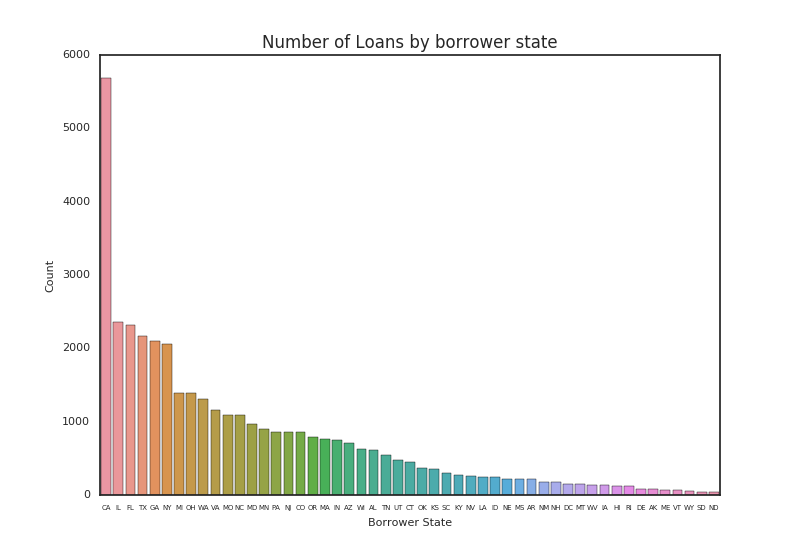

In [37]:
# Plot by abslo
import pandas as pd
count = [item[1] for item in loan_data2.groupBy("BorrowerState")\
                                       .count()\
                                       .sort("count", "BorrowerState", ascending = False)\
                                       .collect()]
BorrowerState = [item[0] for item in loan_data2.groupBy("BorrowerState")\
                                               .count()\
                                               .sort("count", "BorrowerState", ascending = False)\
                                               .collect()]
loanStat_borrow = {"count" : count, 
                   "BorrowerState" : BorrowerState}
loanStat_borrow = pd.DataFrame(loanStat_borrow)

plt.figure()
sns.barplot(x = "BorrowerState", y = "count", data = loanStat_borrow)
plt.ylabel("Count", fontsize = 8)
plt.xlabel("Borrower State", fontsize = 8)
plt.title("Number of Loans by borrower state", fontsize = 12)
plt.xticks(size = 5)
plt.yticks(size = 8)
display(plt.show())

The above plot represents the number of borrowers per state. 
It appears that California concentrates most of borrowers, followed by Illinois, Florida, Texas, New-York and Georgia.

### Bivariate Analysis

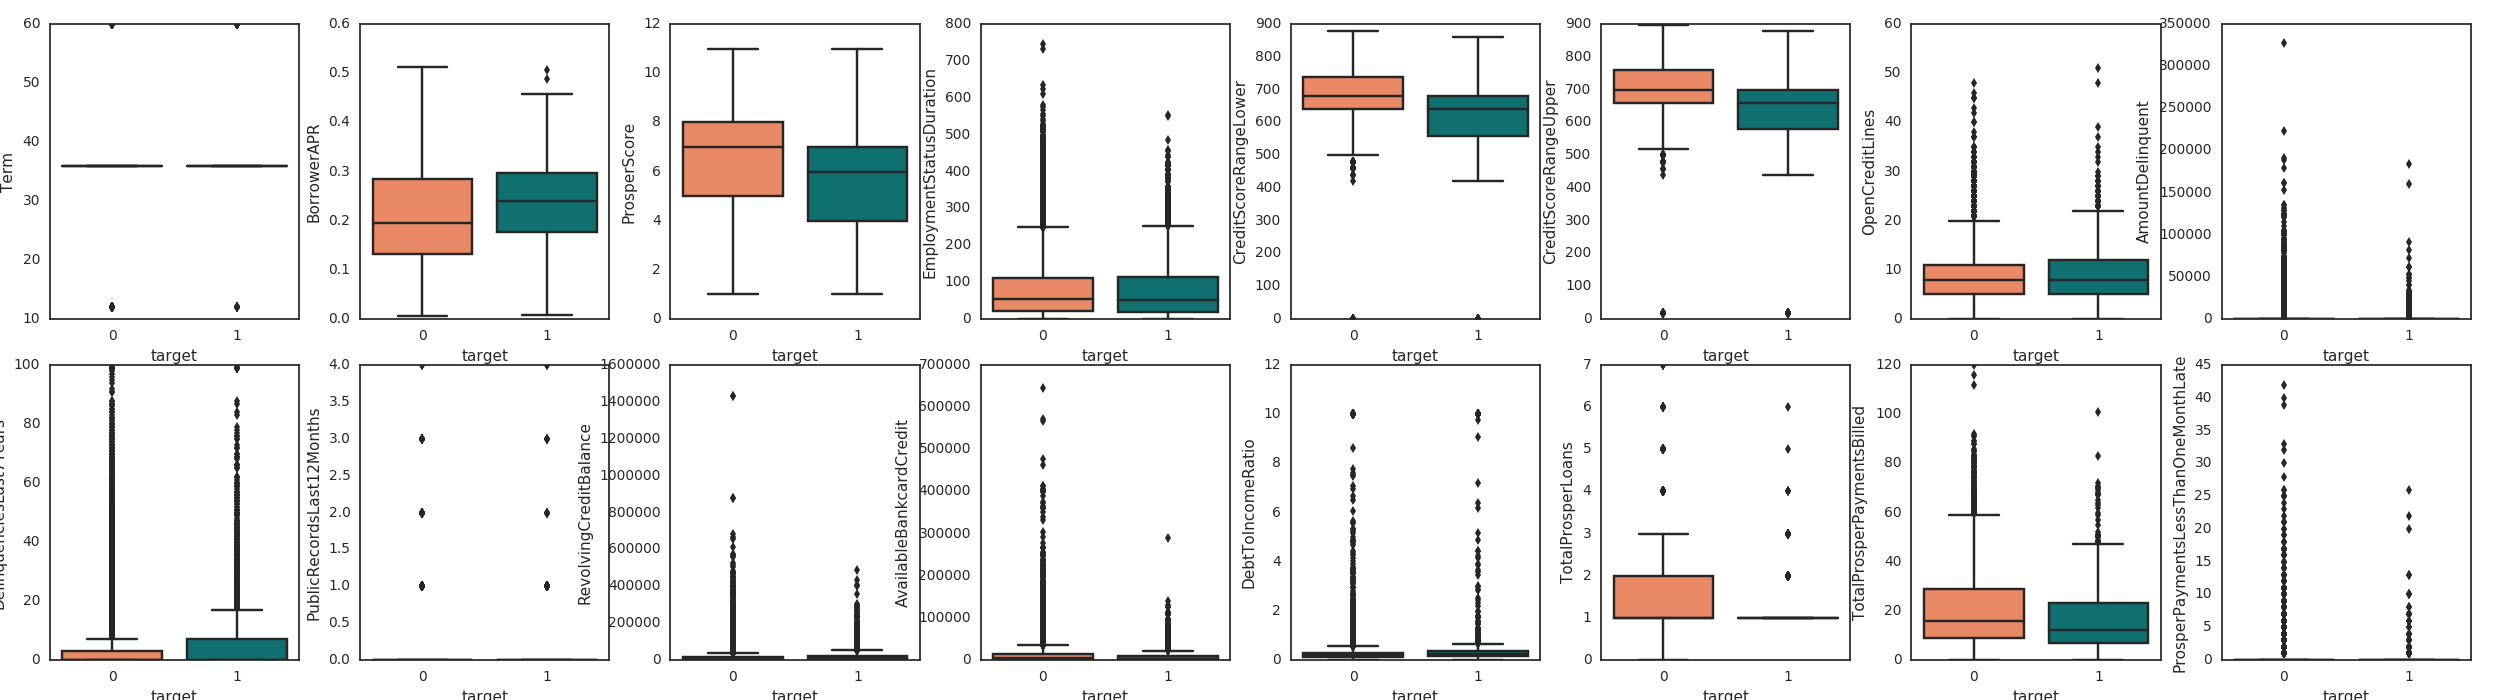

In [39]:
# Boxplot of continuous (numeric) variables
n_rows = 2
n_cols = 8
count = 0
col_num = 0

plt.subplots(n_rows, n_cols, figsize = (25,7))
plt.tight_layout()
colors = ['coral', 'teal']
for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        
        # exclude variable 'target' in boxplot
        sns.boxplot(y = var_num_pd.drop('target', axis = 1).iloc[:, col_num], 
                    x = var_num_pd.target, orient = 'v', palette = colors)
        if col_num < (var_num_pd.drop('target', axis = 1).shape[1] - 1) :
            count += 1
            col_num += 1

display(plt.show())

The above figure allows us to have an overall look of how disguisable between default and non-default groups. Indeed, there are some variables in which the differences between target group 0 and target group 1 seem to be significant such as BorrowerAPR or CreditScoreRange. Nevertheless, the majority of variables seems to be indifferent between two target groups.

######Borrower's characteristics

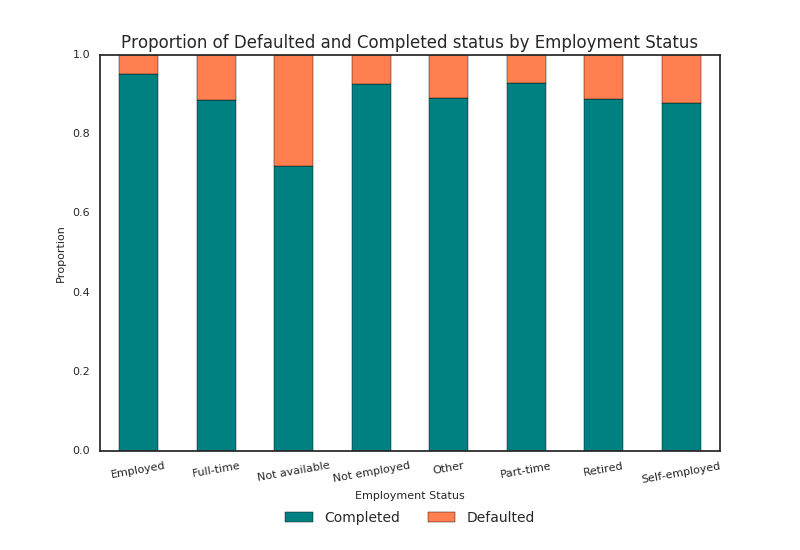

In [41]:
#Employment status
name = "target", "EmploymentStatus", "LoanStatus"
df = loan_data2[name].toPandas()
#creation of apivot table
tps = df.pivot_table(values = ['target'], 
                      index = 'EmploymentStatus',
                      columns = 'LoanStatus',
                      aggfunc = 'count')
colors = ['teal', 'coral']
tps = tps.div(tps.sum(1), axis = 0)

#define 100% stacked bar chart properties from pivot table
fig, ax = plt.subplots()
ax = tps.plot(kind = 'bar', stacked = True, colors = colors)
plt.ylabel("Proportion", fontsize = 8)
plt.xlabel("Employment Status", fontsize = 8)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.title("Proportion of Defaulted and Completed status by Employment Status", fontsize = 12)
plt.xticks(size = 8, rotation = 10)
plt.yticks(size = 8)
ax.legend(("Completed", "Defaulted"), bbox_to_anchor = (0.5, -0.12),
          fancybox = True, ncol = 2, loc = 'upper center')
display(plt.show())

In relative value, we see that the employment status that has the highest percentage of defaulted loans is when the data about employment is non available. It is followed by self-employed category as well as full-time and other categories. One can notice that the lowest rate of default is for the Employed category, followed by Not employed and Part-time. Thus, it is not possible to see any correlation between defaulting and being in a precarious employment.

Let's now check the loan categories depending on the loan status:

In [43]:
#loan categories conditionnal on the loan status
print("Most frequent loan categories for 'Completed' loan status:")
loan_data2.filter(loan_data2.LoanStatus == "Completed")\
          .groupBy("LoanCategory").count()\
          .sort("count", ascending = False).limit(5).show()

print("Most frequent loan categories for 'Defaulted' loan status:")
loan_data2.filter(loan_data2.LoanStatus == "Defaulted")\
          .groupBy("LoanCategory").count()\
          .sort("count", ascending = False).limit(5).show()

Most frequent loan categories for 'Completed' loan status:
+------------------+-----+
 LoanCategory|count|
+------------------+-----+
Debt Consolidation|13167|
 Not Available|10253|
 Other| 4551|
 Business| 2848|
 Home Improvement| 2434|
+------------------+-----+

Most frequent loan categories for 'Defaulted' loan status:
+------------------+-----+
 LoanCategory|count|
+------------------+-----+
 Not Available| 2903|
Debt Consolidation| 1045|
 Business| 301|
 Other| 266|
 Personal Loan| 198|
+------------------+-----+

The difference between defaulted and non defaulted loans is not completely clear, but we can see that the part of business related loan is higher for the defaulted loans.

We have most of data about the income range of the individual, let's check if there is a correlation with the loan status.

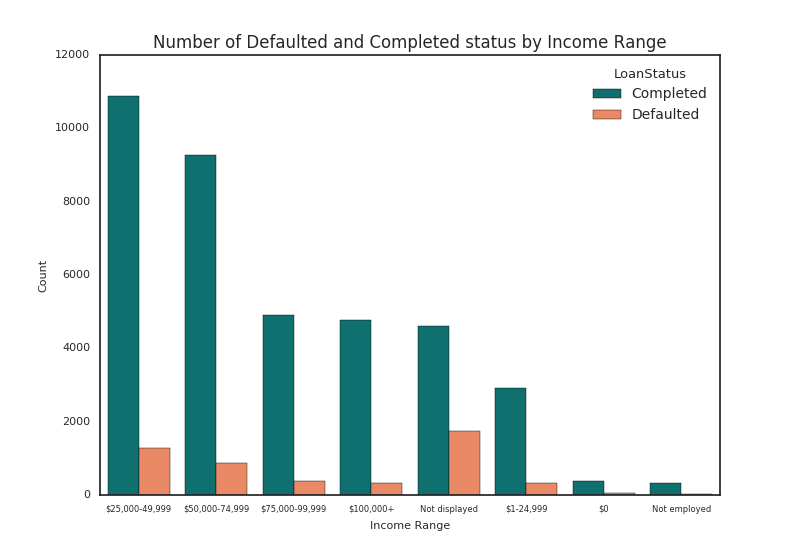

In [46]:
#IncomeRange
count = [item[2] for item in loan_data2.groupBy("LoanStatus", "IncomeRange")\
                                       .count()\
                                       .sort("count", "IncomeRange", ascending = False)\
                                       .collect()]
IncomeRange = [item[1] for item in loan_data2.groupBy("LoanStatus", "IncomeRange")\
                                             .count()\
                                             .sort("count", "IncomeRange", ascending = False)\
                                             .collect()]
LoanStatus = [item[0] for item in loan_data2.groupBy("LoanStatus", "IncomeRange")\
                                            .count()\
                                            .sort("count", "IncomeRange", ascending = False)\
                                            .collect()]
loanStat_income = {"count" : count, 
                   "IncomeRange" : IncomeRange, 
                   "LoanStatus" : LoanStatus}
loanStat_income = pd.DataFrame(loanStat_income)

plt.figure()
sns.barplot(x = "IncomeRange", y = "count", data = loanStat_income, 
            hue = "LoanStatus", palette = ['teal', 'coral'])
plt.ylabel("Count", fontsize = 8)
plt.xlabel("Income Range", fontsize = 8)
plt.title("Number of Defaulted and Completed status by Income Range", fontsize = 12)
plt.xticks(size = 6)
plt.yticks(size = 8)
display(plt.show())

In either group of borrowers, most of borrowers have a decent income. 
Defaulted borrowers for whom we know the income are present in every ranges of income and most of them have a medium-high income. However, the income is missing for a non-negligible part of borrowers.

######Borrower's credit characteristics

We have several information about the characterics of the credit such as the credit grade or the annual rate practiced on the loan. Such information could be interesting for us in order to identify defaulted loans.

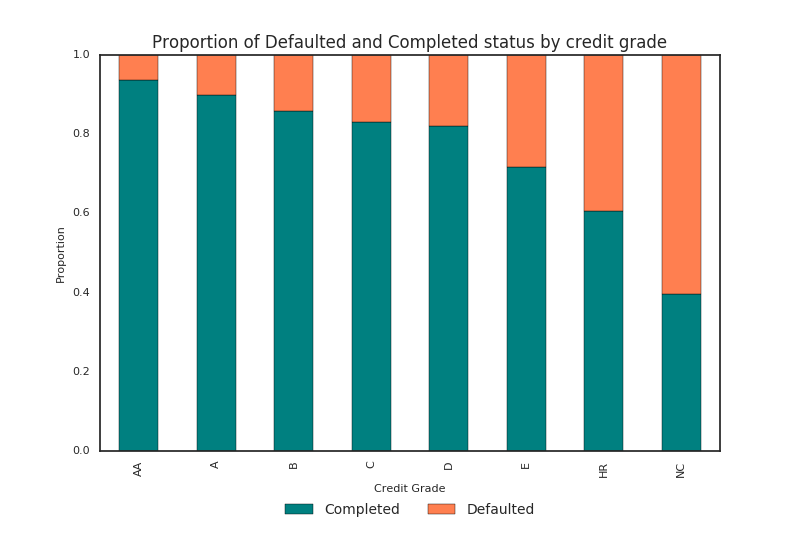

In [49]:
#CreditGrade and loan status
name = "target", "CreditGrade", "LoanStatus"
df = loan_data2[name].toPandas()
tps = df.pivot_table(values = ['target'], 
                      index = 'CreditGrade',
                      columns = 'LoanStatus',
                      aggfunc = 'count')
colors = ['teal', 'coral']
tps = tps.div(tps.sum(1), axis=0)
grades = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']
tps = tps.reindex_axis(grades, axis = 0)
fig, ax = plt.subplots()

ax = tps.plot(kind = 'bar', stacked = True, colors = colors)
plt.ylabel("Proportion", fontsize = 8)
plt.xlabel("Credit Grade", fontsize = 8)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.title("Proportion of Defaulted and Completed status by credit grade", fontsize = 12)
plt.xticks(size = 8)
plt.yticks(size = 8)
ax.legend(("Completed", "Defaulted"), bbox_to_anchor = (0.5, -0.1),
          fancybox = True, ncol = 2, loc = 'upper center')
display(plt.show())

Credit grades measure the credit risk a debt represents. 
One can see that there are defaulted loans for all grade category of the loans but the percentage of defaulted loans increases as the grade rank decreases.
However, the category 'NC' for which we have the biggest part of defaulted loans is the category for which we don't have data about the credit grade.

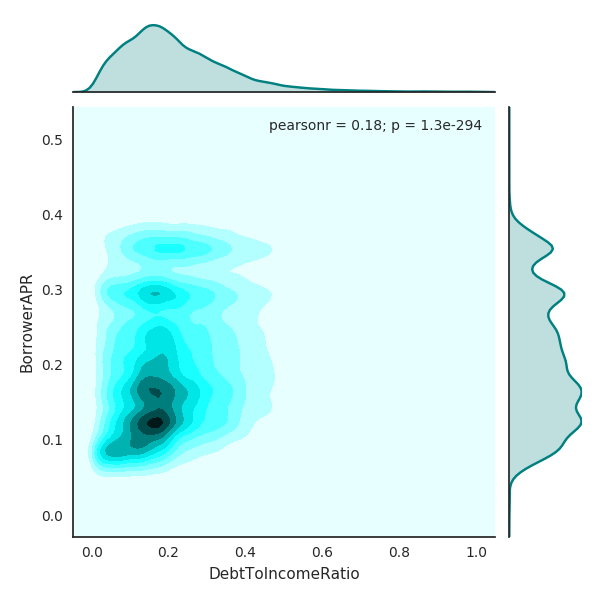

In [51]:
# Bivatiate Distribution: "DebtToIncomeRatio" VS "BorrowerAPR"
# removing some extreme values makes the plot more balancer
name = "DebtToIncomeRatio", "BorrowerAPR"
df = loan_data2[name].toPandas()
df_sub = df.loc[df.DebtToIncomeRatio <= 1, :] 
plt.figure(figsize = (5, 5))
sns.jointplot(x = "DebtToIncomeRatio", y = "BorrowerAPR", data = df_sub, 
              kind = "kde", color = 'teal')
display(plt.show())

We expect that that DebtToIncomeRatio and BorrowerAPR have positive relation to each other, i.e. a client would be charged higher rate if the client has high debt to income. However, the bivariate distribution turns out that BorrowerAPR is fairly independent to DebtToIncomeRatio

##### Main conclusions from the descriptive statistics
- Overall, people pay back their loan. For a lot of defaulted loans, we don't have information on the individual (the income range and the credit grade for example)
- California concentrates most of borrowers, followed by Illinois, Florida, Texas, New-York and Georgia.
- Even people who default have a decent income and a job, but it appears that most of the loans are taken by people who have medium-high income. A bigger part of self-employed people are defaulting, maybe due to their higher risk to loose their job or to the variability of their income. 
- As the credit grade decreases, the part of defaulted loans increases. But there is defaulted loans in all credit grade categories.
- On average, defaulted loans had a bigger annual rate charged compared to the completed loans.

### Correlation

##### Pearson correlation matrix for numerical variables
First, let's do a correlation plot for analysing the possible correlations between the numerical explanatory variables.

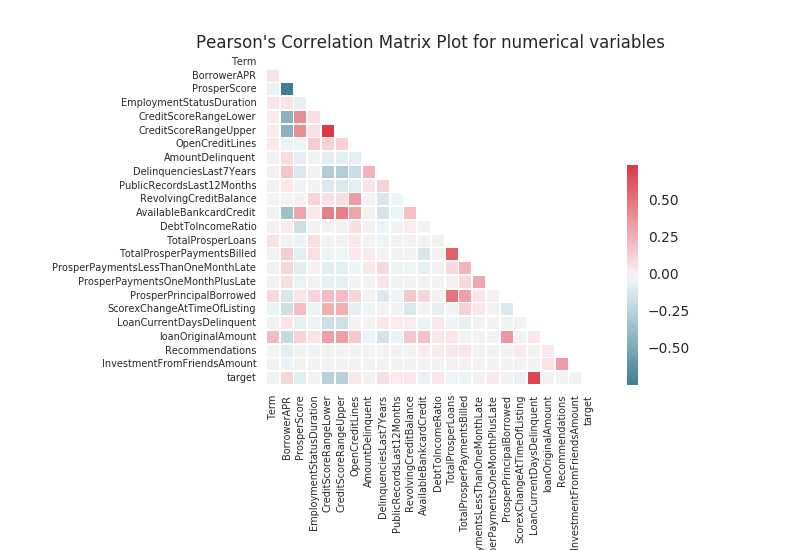

In [56]:
#correlation matrix
sns.set(style = "white")

# Compute the correlation matrix
corr = var_num_pd.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink" : .5})
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.25,
                 box.width, box.height * 0.75])

plt.title("Pearson's Correlation Matrix Plot for numerical variables", fontsize = 12)
plt.xticks(size = 7)
plt.yticks(size = 7)

display(plt.show())

Globally, we see that the numerical variables are not very correlated (according to Pearson's correlation coefficient). Looking at the last row of the correlation matrix, we can see the correlation between the target variable and each numerical explanatory variable. The correlations are all not high, except with the variable LoanCurrentDaysDelinquent which is about the number of days the loan was not paid.

##### Correlation tests for numerical variables

Here we will implement Pearson independence tests between the target variable and all the numerical variables in order to see whether those variables are significantly correlated.

H0
: Variables are dependent    
VS    
H1 
: Variables are independent

In [59]:
#import MLlib package for basic stats
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Matrices, Vectors

To compute correlation tests, we first need to remove the missing values.

In [61]:
#remove NA's is mandatory for Pearson's Chi-square test:
print(var_num.count())
var_num_na = var_num.na.drop()
print(var_num_na.count())

43092
6016

Then using the `MLlib` library (see the documentation), we convert the dataframe of numerical variabel into a RDD of labelled points in order to use the `chiSqTest()` function that implement a Pearson test of independence.

In [63]:
#turn the df into RDD of labelled points
var_num_na_rdd = var_num_na.rdd.map(lambda line: LabeledPoint(line[16],(line[0:16])))
#different to display result of chisq more condensed
featureTestResults = Statistics.chiSqTest(var_num_na_rdd)
records = [(result.statistic, result.pValue) for result in featureTestResults]
chi_df = pd.DataFrame(data=records,index = var_num.columns[:16], columns=["Statistic","p-value"])
chi_df

Out[ 114 ]: 
 Statistic p-value
Term 22.306920 4.417020e-01
BorrowerAPR 16812.149677 0.000000e+00
EmploymentStatusDuration 157.313979 2.085779e-03
CreditScoreRangeLower 3105.990905 1.000000e+00
CreditScoreRangeUpper 158.779915 3.792335e-01
OpenCreditLines 158.779915 3.792335e-01
AmountDelinquent 1198.015797 0.000000e+00
DelinquenciesLast7Years 13049.169202 0.000000e+00
PublicRecordsLast12Months 1674.902216 0.000000e+00
RevolvingCreditBalance 1.094819 1.000000e+00
AvailableBankcardCredit 57606.245105 2.224870e-04
DebtToIncomeRatio 42666.206603 1.000000e+00
LoanCurrentDaysDelinquent 827.837838 1.000000e+00
loanOriginalAmount 158.954777 1.227572e-09
Recommendations 2710.681343 0.000000e+00
InvestmentFromFriendsAmount 7268.889644 0.000000e+00

Not all numerical variables are statistically correlated to the target variable. The most significantly correlated ones are: AvailableBankcardCredit, BorrowerAPR, DelinquenciesLast7Years, which is not suprising since it is related to the financial situation of the lender.

##### Correlation between the categorical variables and the target variable

To study the correlation between each categorical variable and the target variable, we will perform Chi Square tests. In order to conduct such tests  with `MLlib` library, we need to transform categorical (string) variables into indexed variables to fit the labeled points format.


######Note: A labeled point is a local vector, either dense or sparse, associated with a label/response.

In [66]:
# convert string variables into numerical
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

loan_data_stat = spark.read.csv("/FileStore/tables/data_for_ML.csv", sep = ",", 
                                inferSchema = True, 
                                header = True)

cat = loan_data_stat.select("CreditGrade", "BorrowerState", "EmploymentStatus", "IncomeRange", "LoanCategory", 
                            "IsHomeowner","LoanStatus") 
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(cat) for column in cat.columns]

pipeline = Pipeline(stages = indexers)
cat_info = pipeline.fit(cat).transform(cat)

var_catnum = cat_info.select("CreditGrade_index", "BorrowerState_index", 
                             "EmploymentStatus_index", "IncomeRange_index", 
                             "LoanCategory_index", "IsHomeowner_index", "LoanStatus_index")

In [67]:
#turn the df into RDD of labelled points
var_catnum_rdd = var_catnum.rdd.map(lambda line: LabeledPoint(line[6],(line[0:6])))

In [68]:
#different to display result of chisq more condensed
featureTestResults2 = Statistics.chiSqTest(var_catnum_rdd)
records2 = [(result.statistic, result.pValue) for result in featureTestResults2]
chi_df2 = pd.DataFrame(data = records2, 
                       index = var_catnum.columns[ :6], 
                       columns = ["Statistic", "p-value"])
chi_df2

Out[ 72 ]: 
 Statistic p-value
CreditGrade_index 3382.479688 0.000000
BorrowerState_index 491.875896 0.000000
EmploymentStatus_index 1758.515105 0.000000
IncomeRange_index 1913.725201 0.000000
LoanCategory_index 2084.798415 0.000000
IsHomeowner_index 12.907191 0.000327

All the categorical variables are statistically correlated to the target variable. The most significantly correlated ones are: CreditGrade, LoanCategory, Income range , Employment status, which is not suprising since it is related to the financial situation of the lender.

d ## III. Modelling   
#### Let us first deal with missing values


Before starting the modelling, we need first to deal with missing values. More specifically, we first remove variables with too much missing values (i.e proportion >0.4). Then for the remaining variables, we will do some data imputation:
- for categorical variables, if a label is missing, it will be replaced with the most frequent label
- for numerical variables, if a value is missing, it will be replaced with the mean value

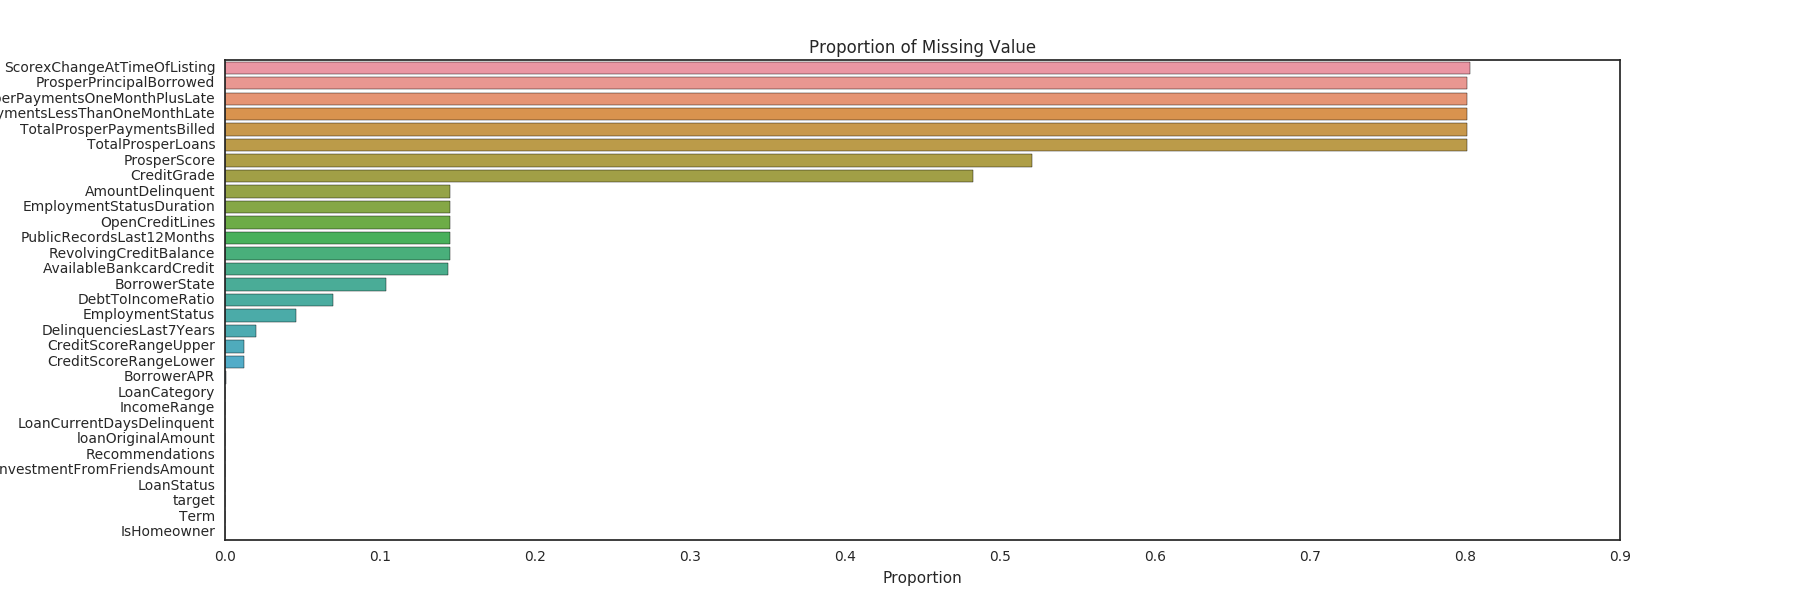

In [71]:
# Missing value in every column

#convert sparkdataframe into panda dataframe to be able to make the plot
loan_data2_pd = loan_data2.toPandas()

# count the propoortion of missing value per variable and sort in descending order
na_count = (loan_data2_pd.isnull().sum(axis = 0)/len(loan_data2_pd)).sort_values(ascending = False) 

#plot the results
plt.figure(figsize = (18, 6))
sns.barplot(x = na_count, y = na_count.index)
plt.xlabel('Proportion')
plt.title('Proportion of Missing Value')
display(plt.show())

In [72]:
#drop this variable since we don't need it for the modeling part
loan_data2=loan_data2.drop("LoanStatus")

#we remove variables with a a high percentage of missing values
loan_data2 = loan_data2.drop("ScorexChangeAtTimeOfListing", "TotalProsperLoans",
                             "ProsperPrincipalBorrowed", "ProsperPaymentsOneMonthPlusLate", 
                             "ProsperPaymentsLessThanOneMonthLate", "TotalProsperPaymentsBilled",
                             "ProsperScore", "CreditGrade")

Let us first separate numeric variables from categorical ones

In [74]:
#get variable type for every variable
var_type = {} 
for var in loan_data2.dtypes:
  var_type[var[0]] = var[1]
  
#create an empty list to store all numerical variable
var_num = [] 
#create an empty list to store all categorical variable
var_cat = [] 


#get only numerical variables
for var in loan_data2.columns:
  #if type is integer or double, will store the variable's name in the var_num, otherwise,
  # it will store it in the var_cat
  if var_type[var] in ['int', 'double']:  
    var_num.append(var)
  else:
    var_cat.append(var)
    
#select only numerical variables
var_num = loan_data2[var_num] 
#select only numerical variables
var_cat = loan_data2[var_cat]

Replacing categorical missing values with most common features

In [76]:
# we first drop Na values
remove_na = var_cat.na.drop()

# we then impute them with the mean of each column
impute_na_cat = var_cat
for c in impute_na_cat.columns:
  most_freq_cat = remove_na.groupBy(c).count()\
                                      .orderBy('count', ascending = False)\
                                      .first()[0]
  #print(c, most_freq_cat)
  impute_na_cat = impute_na_cat.na.fill(most_freq_cat, [c])
  
# we check that there is no any missing value anymore
impute_na_cat.na.drop().count() == loan_data2.count()

Out[ 76 ]: True

Replacing numeric missing values with their mean

In [78]:
# we first drop Na values
remove_na = var_num.na.drop()

# we then impute them with the mean of each column
impute_na_num = var_num
for c in impute_na_num.columns:
  mean = remove_na.agg(fn.mean(c)).first()[0]
  #print(c, mean)
  impute_na_num = impute_na_num.na.fill(mean, [c])
  
# we check that there is no any missing value anymore
impute_na_num.na.drop().count() == loan_data2.count()

Out[ 77 ]: True

We can now join the numerical and categorical dataframes in a new dataframe with no missing values

In [80]:
# in order to perform the join we need to create an index variable
num = impute_na_num.select("*").withColumn("id", fn.monotonically_increasing_id())
cat = impute_na_cat.select("*").withColumn("id", fn.monotonically_increasing_id())
# join the two dataframes
loan_data3 = num.join(cat, 'id')
# drop the index variable
loan_data3 = loan_data3.drop("id")

We can now start modeling. 

As a reminder, we want to predict whether a client will default or not. 
To do so, we will try two models: 
  - Random Forest
  - Logistic Regression

### Random Forest
We first perform a Random Forest using the `MLlib` library that requires to use label points as input, as we previously did to compute the chi-square statistic.

 ##### Preparing the data for fitting a Random Forest with `MLlib`
 In order to do this, we need to transform categorical (string) variables into indexed variables to fit the labeled points format. This will be done through the use of the Pipeline.

In [83]:
# We drop the "id" column from the cat dataset as it is no longer of interest
cat = cat.drop("id")
print(cat.columns)

['BorrowerState', 'EmploymentStatus', 'IncomeRange', 'LoanCategory', 'IsHomeowner']

In [84]:
# We now transform categorical variables into indexed variables in order to use labeled points for performing the random forest
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer

data = loan_data3

#take as input names of  categorical variables of the dataset that are stored in column, transform into indexes and give as output news columns that are the indexed version of the initial categorical variables
indexers = [StringIndexer(inputCol = column, 
                          outputCol = column + "_index").fit(data) for column in cat.columns]

#create a pipeline that will make the transformation
pipeline = Pipeline(stages = indexers)

#apply this transformation to the categorical variables of our dataset using pipeline
data = pipeline.fit(data).transform(data)

#drop the initial categorical variables
data = data.drop(*cat.columns)

#Check that we have indexes instead of string labels
display(data.limit(5))

Term,BorrowerAPR,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,OpenCreditLines,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast12Months,RevolvingCreditBalance,AvailableBankcardCredit,DebtToIncomeRatio,LoanCurrentDaysDelinquent,loanOriginalAmount,Recommendations,InvestmentFromFriendsAmount,target,BorrowerState_index,EmploymentStatus_index,IncomeRange_index,LoanCategory_index,IsHomeowner_index
36,0.35797,84,720,739,12,0.0,0,0,9899.0,16554.0,0.54,167,4000,0,0.0,1,7.0,1.0,0.0,0.0,0.0
36,0.34631,24,640,659,8,71.0,0,0,1860.0,258.0,0.29,0,3000,0,0.0,0,14.0,0.0,1.0,2.0,1.0
36,0.14117,67,720,739,13,0.0,0,0,4978.0,924.0,0.38,0,10000,0,0.0,0,2.0,0.0,1.0,0.0,1.0
36,0.07439,34,740,759,11,0.0,0,0,20505.0,25285.0,0.23,0,5177,0,0.0,0,10.0,0.0,1.0,0.0,1.0
36,0.30564,10,520,539,2,10696.0,31,0,0.0,0.0,0.09,0,2500,0,0.0,0,1.0,0.0,0.0,1.0,0.0


We now create our training and test datasets. To do so, we first sample within defaulted and completed observations separately in order to avoid unbalanced classes which could bias our predictions.

In [86]:
from pyspark.mllib.regression import LabeledPoint

# Step 1 : we sample according to the class of the target variable
data_defaulted = data.filter(data.target == 1)
data_completed = data.filter(data.target == 0)
(train_defaulted, test_defaulted) = data_defaulted.randomSplit([0.7, 0.3], 
                                                               seed = 1234)
(train_completed, test_completed) = data_completed.randomSplit([0.5, 0.5], 
                                                               seed = 1234)

# Step 2 : we join the datasets
trainData = train_defaulted.union(train_completed)
testData = test_defaulted.union(test_completed)

# Step 3 : we apply the labeled points format
trainData_feat_lab = trainData.rdd.map(lambda line: LabeledPoint(line[16], [line[:16] + line[17:]]))
testData_feat_lab  = testData.rdd.map(lambda line: LabeledPoint(line[16], [line[:16] + line[17:]]))

We create a dictionary of categorical variables that will be an input of our Random Forest.

In [88]:
# Count unique values for each new indexed variable
count_states = data.select("BorrowerState_index").distinct().count()
count_empstatus = data.select("EmploymentStatus_index").distinct().count()
count_incomeranges = data.select("IncomeRange_index").distinct().count()
count_loancat = data.select("LoanCategory_index").distinct().count()
count_isHomeowner = data.select("IsHomeowner_index").distinct().count()

# Create a dictionary with indexed features
categorical_info = {16 : count_states, 
                    17 : count_empstatus, 
                    18 : count_incomeranges, 
                    19 : count_loancat,
                    20 : count_isHomeowner
                   }
print(categorical_info)

{16: 51, 17: 8, 18: 8, 19: 21, 20: 2}

#####Fitting the Random forest model

In [90]:
from pyspark.mllib.tree import RandomForest, RandomForestModel
import time as time
#Store the starting time
t0 = time.time()

#fit a random forest model using the RandomForest.trainClassifier function, the categorical variables need to be specified in the categoricalFeaturesInfo option while the number of categories for the target variable is specified within the numClasses option
forest_model = RandomForest.trainClassifier(trainData_feat_lab, 
                                            numClasses = 2, 
                                            categoricalFeaturesInfo = categorical_info, 
                                            numTrees = 50, 
                                            impurity = 'gini',
                                            maxDepth = 12, 
                                            maxBins = 255)

#Store the starting time
t1 = time.time()

#computational time to fit the model
print("finished in %f seconds" % (t1 - t0))


finish in 780.653213 seconds

In [91]:
print("number of trees:", forest_model.numTrees())
print("number of nodes:", forest_model.totalNumNodes())

number of trees: 50
number of nodes: 8290

##### Evaluating the fitted model


Let us now evaluate the performance of the Random Forest on our training and test sets.

In [93]:
# Predict on the train set
predictions_train = forest_model.predict(trainData_feat_lab.map(lambda x: x.features))

# Extract the predicted labels
labelsAndPredictions_train = trainData_feat_lab.map(lambda lp: lp.label).zip(predictions_train)

# Compute the error rate on the train set
trainErr = labelsAndPredictions_train.filter(lambda lp: lp[0] != lp[1]).count() / float(trainData.count())
print('Training Error = ' + str(trainErr))

Training Error = 0.0

In [94]:
# Predict on the Test set
predictions_test = forest_model.predict(testData_feat_lab.map(lambda x: x.features))

# Extract the predicted labels
labelsAndPredictions_test = testData_feat_lab.map(lambda lp: lp.label).zip(predictions_test)

# Compute the error rate on the test set
testErr = labelsAndPredictions_test.filter(lambda lp: lp[0] != lp[1]).count() / float(testData.count())
print('Test Error = ' + str(testErr))

Test Error = 0.0

In [95]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Compute some performance metrics on the test set
metrics = BinaryClassificationMetrics(labelsAndPredictions_test)
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under ROC = 1.0

The closer the Area under the ROC curve is to 1, the more efficient is the model in predicting the right class. 

Hence, one can see that the model is really good on both the test and training sets since the error-rate is equal to 0 on both sets and the Area under the ROC curve is equal to 1.

###Logistic regression

Let's fit another model and evaluate its performance.
We here re-start from the cleaned dataset with imputed missing values. Indeed, since we perform a regression, we use One hot encoding in order to transform categorical variables into dummies, which is more relevant for this classification method.
A different strategy from the previous model will be used. More specifically we will use pipeline to directly transform categorical variables into dummies (one hot encoding) and to fit the logistic regression.

##### Creating the pipeline


Let us first define our pipeline in order to tranform the variables and to perform the Logistic regression.

In [99]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler, VectorIndexer

dl = loan_data3
stages = []  #create an empty list that will store all the steps of data transformation and preparation

# Step 1 : Transformation of variables
for categoricalCol in cat.columns:
  
  #transform the categorical variables into indexes
  stringIndexer = StringIndexer(inputCol = categoricalCol, 
                                  outputCol = categoricalCol + 'Index')  
  
  #then into dummies
  encoder = OneHotEncoderEstimator(inputCols = [stringIndexer.getOutputCol()], 
                                   outputCols = [categoricalCol + "classVec"]) 
  #store the two steps in the list
  stages += [stringIndexer, encoder] 
  
#specify our target variable and call it label  
label_stringIdx = StringIndexer(inputCol = 'target', outputCol = 'label') 

#add the label variable in the stage
stages += [label_stringIdx] 

#specify the numerical variables
numericCols = dl.columns[:16] 

#assemble numerical and new dummies together
assemblerInputs = [c + "classVec" for c in cat.columns] + numericCols 

#transform the list of all the variables into vectors that we call features 
#i.e for each observation, we have a vector with all the features inside
assembler = VectorAssembler(inputCols = assemblerInputs, outputCol = "features") 

#add all the features to the stages list
stages += [assembler] 

# Step 2 : Definition of the logistic model
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
#fit a logistic regression specifying the name of the vector (features) in which 
#there is all the explanatory variables are in the vector called features and 
#specifying the name of the target variables
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter = 10)

# Step 3 : Chain indexers and model in a Pipeline
pipeline_lr = Pipeline(stages = [Pipeline(stages = stages), lr])

We now reconstruct a training and test dataset

In [101]:
data = dl
data_defaulted = data.filter(data.target == 1)
data_completed = data.filter(data.target == 0)

(train_defaulted, test_defaulted) = data_defaulted.randomSplit([0.7, 0.3], seed = 1234)
(train_completed, test_completed) = data_completed.randomSplit([0.5, 0.5], seed = 1234)

trainData = train_defaulted.union(train_completed)
testData = test_defaulted.union(test_completed)

##### Let's transform the features and fitting the model within a pipeline

Let's train the model and look at the errors of prediction on the training and the test sets.

In [104]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Transform categorical variables into dummies and Train the model using the created pipeline
model_lr = pipeline_lr.fit(trainData)

#predict on the train set
predictions_train_lr = model_lr.transform(trainData)

# Evaluate the model on the training set
evaluator = MulticlassClassificationEvaluator()
accuracy_lr = evaluator.evaluate(predictions_train_lr)
print("Train Error = %g" % (1.0 - accuracy_lr))



#predict on the test set
predictions_test_lr = model_lr.transform(testData)

# Evaluate the model on the test set
accuracy_lr = evaluator.evaluate(predictions_test_lr)
print("Test Error = %g" % (1.0 - accuracy_lr))

Train Error = 0.0318797
Test Error = 0.0179164

Let's have a look at the ROC curve

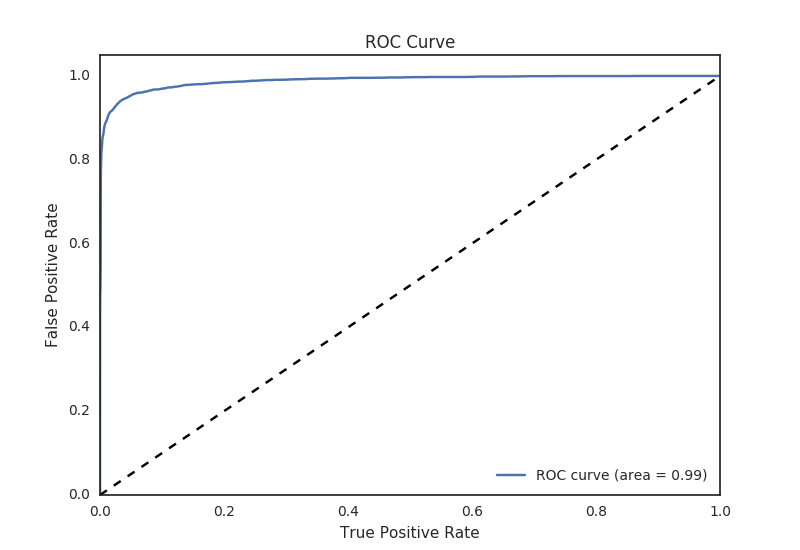

In [106]:
import matplotlib.pyplot as plt

trainingSummary = model_lr.stages[-1].summary

auc = trainingSummary.areaUnderROC
roc = trainingSummary.roc.toPandas()
plt.figure()
plt.plot(roc['FPR'], roc['TPR'], label = 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
display(plt.show())

The closer the ROC curve is to the top-left corner , the more efficient is the model in predicting the right class. 

Hence, one can see that the model is really good on both the test and training sets since the error-rate is equal to 0.03 on the train set and 0.01 on the test set. Moreover, the ROC curve is really close to the  top-left corner .

### Tuning
The train.classifier function implements a set of sensible default hyperparameters but these are not guaranteed to be optimal for a problem. So let's tune the hyperparameters of our random forest model in order to improve its performance. To do so, we will use the scikit learn library which has several functions.

Indeed in our case, the Random Forest model does not make any error with the default parameters but for the sake of the exercise, we show how to tune them in case we would have needed to improve it.

Let's first do somme manipulations for the tuning

In [109]:
#Stock features in a vector
X = []
for obs in trainData_feat_lab.collect():
    X.append(obs.features)
    
#Stock labels in a vector
Y = []
for obs in trainData_feat_lab.collect():
    Y.append(obs.label)

In [110]:
from sklearn import grid_search, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
digits = datasets.load_digits()

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False], 
              "n_estimators": [10, 20, 40, 80]}
gs = grid_search.GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
gs.fit(X, Y)

/databricks/python/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
 "This module will be removed in 0.20.", DeprecationWarning)
/databricks/python/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
 DeprecationWarning)
 Out[ 104 ]: 
GridSearchCV(cv=None, error_score='raise',
 estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
 max_depth=None, max_features='auto', max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
 verbose=0, warm_start=False),
 fit_params={}, iid=True, n_jobs=1,
 param_grid={'min_samples_split': [2, 3, 10], 'n_estimators': [10, 20, 40, 80], 'bootstrap': [True, False], 'max_depth': [3, None], 'min_samples_leaf': [1, 3, 10], 'max_features': [1, 3, 10]},
 pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

The last command allows us to retrieve the optimal parameters for the Random Forest so let's now use them.

In [112]:
#Store the starting time
t0 = time.time()

#fit a random forest model with optimal parameters
tuned_forest_model = RandomForestClassifier(bootstrap=True, 
                                            class_weight=None, 
                                            criterion='gini',
                                            max_depth=None, 
                                            max_features='auto', 
                                            max_leaf_nodes=None,
                                            min_impurity_split=1e-07, 
                                            min_samples_leaf=1,
                                            min_samples_split=2, 
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=10, 
                                            n_jobs=1, 
                                            oob_score=False, 
                                            random_state=None,
                                            verbose=0, 
                                            warm_start=False)
tuned_forest_model.fit(X, Y)
#Store the starting time
t1 = time.time()

#computational time to fit the model
print("finished in %f seconds" % (t1 - t0))

finished in 0.605400 seconds

Let's now evaluate the performance of our new classifier on the test set

In [114]:
#Stock features in a vector
X_test = []
for obs in testData_feat_lab.collect():
    X_test.append(obs.features)
    
#Stock labels in a vector
Y_test = []
for obs in testData_feat_lab.collect():
    Y_test.append(obs.label)
    
#Predictions on the test set
tuned_forest_model.predict(X_test)

#Misclassification rate 
err = sum(tuned_forest_model.predict(X_test) != Y_test)
print("Test Error = %g" % (err))

Test Error = 0

As the default parameters we previously used, the optimal parameters also lead to 0 error on the test set.

# CONCLUSION

- Considering the descriptive statistics implemented on our dataset, our explanatory variables are significantly correlated with the loan status of the customer, which means that we knew that we could predict this outcome using the chosen features. However, this analysis was limited because of the volume of Non Available data in some variables. We saw that customers were more likely to be defaulted for some features being NA, thus our algorithm could also use this information as a predictor.
- The two methods we used for predicting whether a client will default performed very well. However, they turned out to be very costly in terms of preparation and cleaning of the data especially because none of the method handled missing values and because categorical variables needed a specific treatment. The use of a Pipeline for the Logistic Regression was very convenient for transforming and performing the model within a "unique" chain.